In [38]:
import random

# ElGamal encryption as PKE scheme (https://en.wikipedia.org/wiki/ElGamal_encryption)
def elgamal_keygen():
    # For simplicity, we use small primes and a generator
    p = 23  # A small prime
    g = 5   # A primitive root modulo p
    x = random.randint(1, p-2)  # Private key
    h = pow(g, x, p)            # Public key
    return (p, g, h), x         # Return public and private keys

def elgamal_encrypt(pk, m):
    p, g, h = pk
    y = random.randint(1, p-2)  # Random integer
    s = pow(h, y, p)
    c1 = pow(g, y, p)
    c2 = (m * s) % p
    return (c1, c2)

def elgamal_decrypt(sk, c, p):
    c1, c2 = c
    s = pow(c1, sk, p)
    s_inv = pow(s, -1, p)  # Modular inverse of s
    m = (c2 * s_inv) % p
    return m

pk, sk = elgamal_keygen()
print(f"Public Key: {pk}, Private Key: {sk}")

m = 20
print(f"Message: {m}")
c1, c2 = elgamal_encrypt(pk, m)
print(f"Ciphertext: (c1: {c1}, c2: {c2})")

d_m = elgamal_decrypt(sk, (c1, c2), pk[0])
print(f"Decrypted Message: {d_m}")

Public Key: (23, 5, 14), Private Key: 21
Message: 20
Ciphertext: (c1: 11, c2: 6)
Decrypted Message: 20


In [ ]:
import random

# ElGamal encryption as OT PKE scheme (3.2 Constructing PKE with Oblivious Key Generation)

def elgamal_keygen(sk):
  g = 5   # A primitive root modulo p
  h = g**sk
  return (g, h)

def elgamal_encrypt(pk, m):
  r = random.randint(1, q-2)  # Random integer
  g, h = pk
  c1 = g**r
  c2 = m * (h**r)
  return (c1, c2)

def elgamal_decrypt(sk, c, q):
  c1, c2 = c
  m = c2 * (c1**(q-1-sk)) % q
  return m

q = 23  # A small prime
g = 5   # A primitive root modulo q

sk = random.randint(1, q-2)  # Private key
pk = elgamal_keygen(sk)
print(f"Public Key: {pk}, Private Key: {sk}")

m = 20
print(f"Message: {m}")

c1, c2 = elgamal_encrypt(pk, m)
print(f"Ciphertext: (c1: {c1}, c2: {c2})")

d_m = elgamal_decrypt(sk, (c1, c2), q)
print(f"Decrypted Message: {d_m}")

Public Key: (5, 78125), Private Key: 7
Message: 20
Ciphertext: (c1: 19073486328125, c2: 18367099231598242312011508394097588715916649324563867523574245410600269678980112075805664062500)
Decrypted Message: 20


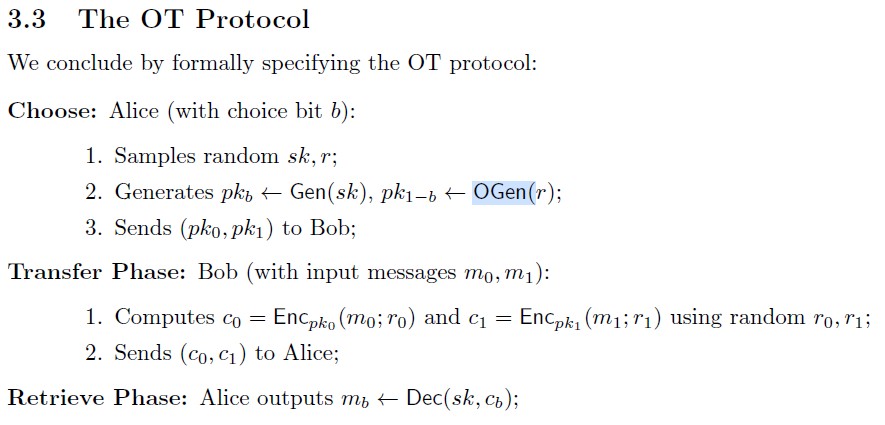

In [ ]:
# TODO: We need to make an OGen function for Alice


In [ ]:
# OT protocol w/ ElGamal PKE scheme

# Alice w/ choice bit b
sk = random.randint(1, q-2)  # Private key
r = random.randint(1, q-2)  # Random integer